In [23]:
import pandas as pd


In [24]:
sales_df = pd.read_csv("Data Sciene Internship Assignment Datasets/sales.csv")
promotion_df = pd.read_csv("Data Sciene Internship Assignment Datasets/promotion.csv")
items_df = pd.read_csv("Data Sciene Internship Assignment Datasets/item.csv")
supermarkets_df = pd.read_csv("Data Sciene Internship Assignment Datasets/supermarkets.csv")


In [25]:
print(sales_df.info())
print(sales_df.head())

print(promotion_df.info())
print(promotion_df.head())

print(items_df.info())
print(items_df.head())

print(supermarkets_df.info())
print(supermarkets_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   code         1048575 non-null  int64  
 1   amount       1048575 non-null  float64
 2   units        1048575 non-null  int64  
 3   time         1048575 non-null  int64  
 4   province     1048575 non-null  int64  
 5   week         1048575 non-null  int64  
 6   customerId   1048575 non-null  int64  
 7   supermarket  1048575 non-null  int64  
 8   basket       1048575 non-null  int64  
 9   day          1048575 non-null  int64  
 10  voucher      1048575 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 88.0 MB
None
         code  amount  units  time  province  week  customerId  supermarket  \
0  7680850106    0.80      1  1100         2     1      125434          244   
1  3620000470    3.59      1  1100         2     1      125434          244   
2  1800028064    2.25

In [26]:
print(sales_df.isnull().sum())
print(promotion_df.isnull().sum())
print(items_df.isnull().sum())
print(supermarkets_df.isnull().sum())


code           0
amount         0
units          0
time           0
province       0
week           0
customerId     0
supermarket    0
basket         0
day            0
voucher        0
dtype: int64
code            0
supermarkets    0
week            0
feature         0
display         0
province        0
dtype: int64
code          0
descrption    0
type          0
brand         0
size          0
dtype: int64
supermarket_No    0
postal-code       0
dtype: int64


In [27]:
print(sales_df.duplicated().sum())
print(promotion_df.duplicated().sum())
print(items_df.duplicated().sum())
print(supermarkets_df.duplicated().sum())


0
0
0
0


In [28]:
# For instance, check for missing values and handle them (drop or fill with appropriate values)
items_df = items_df.dropna()  # or use items_df.fillna('Unknown') based on the data
sales_df = sales_df.dropna(subset=['amount', 'units', 'code'])  # Drop rows where critical fields are missing
promotion_df = promotion_df.dropna(subset=['code', 'supermarkets'])  # Drop rows where critical fields are missing
supermarkets_df = supermarkets_df.dropna(subset=['supermarket_No'])

In [29]:
items_df.columns = items_df.columns.str.strip().str.lower()  # Clean column names
sales_df.columns = sales_df.columns.str.strip().str.lower()
promotion_df.columns = promotion_df.columns.str.strip().str.lower()
supermarkets_df.columns = supermarkets_df.columns.str.strip().str.lower()

In [33]:
# Step 4: Standardize column names for consistency
for df in [items_df, sales_df, promotion_df, supermarkets_df]:
    df.columns = df.columns.str.strip().str.lower().str.replace('_', '')

# Match similar column names across all dataframes
column_mapping = {
    'supermarketno': 'supermarket',
    'supermarkets': 'supermarket',
    'descrption': 'description'
}
for df in [items_df, sales_df, promotion_df, supermarkets_df]:
    df.rename(columns=column_mapping, inplace=True)

In [34]:
for df in [items_df, sales_df, promotion_df, supermarkets_df]:
    print(df.columns)

Index(['code', 'description', 'type', 'brand', 'size'], dtype='object')
Index(['code', 'amount', 'units', 'time', 'province', 'week', 'customerid',
       'supermarket', 'basket', 'day', 'voucher'],
      dtype='object')
Index(['code', 'supermarket', 'week', 'feature', 'display', 'province'], dtype='object')
Index(['supermarket', 'postal-code'], dtype='object')


In [36]:
print(sales_df['time'])

0          1100
1          1100
2          1137
3          1148
4          1323
           ... 
1048570    1307
1048571    1307
1048572    1410
1048573    1415
1048574    1415
Name: time, Length: 1048575, dtype: int64


In [37]:
# Ensure all time values are 4 digits (e.g., '8' becomes '0800')
sales_df['time'] = sales_df['time'].astype(str).str.zfill(4)

# Convert the time column to HH:MM format
sales_df['time'] = pd.to_datetime(sales_df['time'], format='%H%M').dt.strftime('%H:%M')

# Convert 'week' in promotion to numeric if needed
promotion_df['week'] = pd.to_numeric(promotion_df['week'], errors='coerce')

# Convert 'amount' and 'units' in sales to numeric
sales_df['amount'] = pd.to_numeric(sales_df['amount'], errors='coerce')
sales_df['units'] = pd.to_numeric(sales_df['units'], errors='coerce')

In [38]:
# Merging sales data with item data based on 'code'
sales_items_df = pd.merge(sales_df, items_df, on='code', how='left')

print(sales_items_df.columns)


Index(['code', 'amount', 'units', 'time', 'province', 'week', 'customerid',
       'supermarket', 'basket', 'day', 'voucher', 'description', 'type',
       'brand', 'size'],
      dtype='object')


In [39]:
# Merging sales data with promotions
sales_promotion_df = pd.merge(sales_items_df, promotion_df, on=['code', 'supermarket'], how='left')
print(sales_promotion_df.columns)

Index(['code', 'amount', 'units', 'time', 'province_x', 'week_x', 'customerid',
       'supermarket', 'basket', 'day', 'voucher', 'description', 'type',
       'brand', 'size', 'week_y', 'feature', 'display', 'province_y'],
      dtype='object')


In [40]:

# Merging with supermarket info
final_df = pd.merge(sales_promotion_df, supermarkets_df, on='supermarket', how='left')


In [41]:
# For example, create a new column for sales revenue (amount * units)
final_df['revenue'] = final_df['amount'] * final_df['units']

# Step 8: Save cleaned and transformed data to a new CSV or DataFrame
final_df.to_csv('cleaned_sales_data.csv', index=False)

print("Data cleaning and transformation complete.")

Data cleaning and transformation complete.


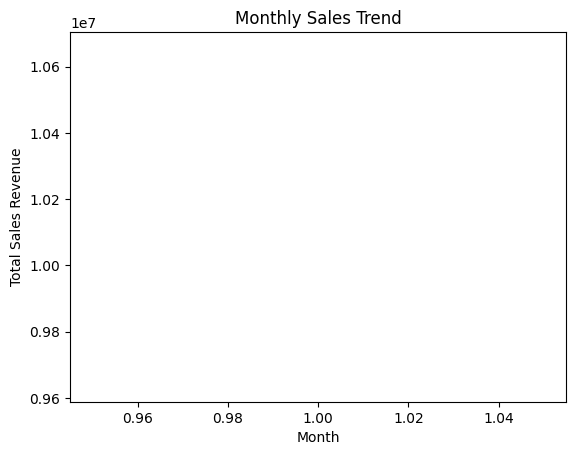

In [21]:
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_sales_data.csv")
df["date"] = pd.to_datetime(df["date"])
df.groupby(df["date"].dt.month)["revenue"].sum().plot(kind="line")

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Revenue")
plt.show()